<H1 align="center"> Migraciones <br> <br> Un caso práctico de análisis exploratorio con datos de poblacionales </center></H1> <br> <br><br> 

<center> Roque Leal </center> 
<center>DataScience</center> <br> 

## Introducción

Durante los últimos diez años, los países desarrollados han experimentado una variedad de problemas relacionados con la migración. La Organización Internacional para las Migraciones (OIM) declaró en la Agenda 2030 para el Desarrollo Sostenible una serie de lineamientos que contribuyen directamente a muchos Objetivos de Desarrollo Sostenible (ODS). Por ejemplo:

- 10: Reducir las desigualdades 
- 10.7: Políticas de migración bien administradas 
- 10.c: Remesas.

Investigadores de todo el mundo buscan respuestas y soluciones para colaborar con estos lineamientos. En esta caso el papel de los científicos de datos, consiste en aplicar diferentes algoritmos para identificar causas raíz y hacer predicciones. Por ello, en este caso particular el presente estudio intenta colaborar en responder la siguiente pregunta:

"Cuáles son las posibles causas de la migración y cómo la migración evolucionará con el tiempo".

Para encontrar respuestas, se realizará una exploración de la migración a nivel global y un caso particular de la migración en América del Sur. En general, el estudio actual se puede tratar como análisis de datos exploratorios. Es decir, se explorarán los conjuntos de datos sobre la correlación y se construirán algunos modelos de regresión. Para el desarrollo de las predicciones se consideran los problemas y limitaciones de dicho análisis (falsa correlación, multicolinealidad, etc.) sin embargo, los resultados obtenidos se compararán con los resultados del modelo System Dynamics realizado por Wigman (2018).

Desde el punto de vista práctico, este Jupyter Notebook consta de los siguientes pasos. Primero, temas relacionados con los conjuntos de datos descargados y preprocesados. En segundo lugar, los resultados se trazan para obtener algunas ideas. En tercer lugar, se aplicaran un par de algoritmos para identificar relaciones y predecir flujos de migración futuros. Y finalmente, una comparación con los resultados del modelo System Dynamics realizado.

Para responder a la pregunta de investigación establecida se utilizaron 4 conjuntos de datos, a saber,

1. Naciones Unidas Stock internacional de migrantes 2015 (Naciones Unidas, 2015),
2. Migración neta del Banco Mundial (Banco Mundial, 2018),
3. Índice de Estado Frágil (Fondo para la Paz, 2018),
4. Resultados de la simulación de System Dynamics (Wigman, 2018).

El primero servirá principalmente para fines de visualización. Los valores del segundo servirán como variables predictivas (y), mientras que el Índice de estado frágil como predictores (x). El cuarto a efectos comparativos. 

Finalmente, se utilizó Natural Earth para unsar los shapefiles y trazar los datos en el mapa mundial.


## Exploración de los datos

### Naciones Unidas Stock internacional de migrantes 2015

Este conjunto de datos no es más que datos de migración por país de origen y destino. Se descargó de las Naciones Unidas (2015) como un archivo Excel en formato xlsx. Los datos sobre diferentes años se dividen en hojas de Excel separadas. Las filas representan región, subregión o país de destino, mientras que las columnas son países de origen. El archivo original se modificó ligeramente, por ejemplo, los encabezados se dividieron para evitar problemas con el índice múltiple.

Desafortunadamente, este conjunto de datos tiene un número bastante limitado de puntos de datos y, por lo tanto, difícilmente puede usarse para algoritmos. Sin embargo, se puede utilizar para visualizar dinámicas de migración. Igualmente se descartó utilizar los datos preliminares para el 2017, ya que para el caso práctico de América del Sur es evidente el ruido en los datos para Venezuela debido al propio ajuste que debe realizarse.

#### Load the data

In [102]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
import geopandas as gpd
from sklearn import preprocessing

In [103]:
import time

# Almacenaremos todas las hojas para varios años como un dictado de pandas para un fácil acceso por año
sheet_name = "Table "  # Nombre original de la hoja 
sheet_numbers = [1, 4, 7, 10, 13, 16]  # Número de hojas
years = [1990, 1995, 2000, 2005, 2010, 2015]  # Años disponibles
n = len(sheet_numbers)  # Número de datos disponibles

my_dict = {}  # estructura de los datos 
# {'1990' : df_1990, '1995' : df_1995 ...}

path = "data/UN_MigrantStockByOriginAndDestination_2015.xlsx"

start_time = time.time()
for i in range(n):
    sheet_name = "Table " + str(sheet_numbers[i])
    my_dict[years[i]] = pd.read_excel(path, sheet_name=sheet_name, header=[15])
    print(str(years[i]) + " datos cargados")
elapsed_time = time.time() - start_time

print(str(round(elapsed_time, 2)) + " tiempo")

1990 datos cargados
1995 datos cargados
2000 datos cargados
2005 datos cargados
2010 datos cargados
2015 datos cargados
36.26 tiempo


In [104]:
# Datos
my_dict[2010].head()

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Total,Other North,Other South,Afghanistan,Albania,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1,WORLD,NaN,900,NaN,221714243,2077453.0,7964398.0,5003276.0,1110296.0,...,332362.0,1913257.0,7939.0,550420.0,2306669.0,7461.0,91965.0,880927.0,209456.0,666407.0
1,2,Developed regions,(b),901,NaN,132560325,516607.0,4390410.0,395566.0,1105788.0,...,171734.0,1467082.0,2243.0,446524.0,2008501.0,1.0,58.0,60669.0,61985.0,223434.0
2,3,Developing regions,(c),902,NaN,89153918,1560846.0,3573988.0,4607710.0,4508.0,...,160628.0,446175.0,5696.0,103896.0,298168.0,7460.0,91907.0,820258.0,147471.0,442973.0
3,4,Least developed countries,(d),941,NaN,10018128,272306.0,905106.0,0.0,0.0,...,527.0,1199.0,71.0,4616.0,77715.0,0.0,0.0,358.0,59408.0,79972.0
4,5,Less developed regions excluding least develop...,NaN,934,NaN,79135790,1288540.0,2668882.0,4607710.0,4508.0,...,160101.0,444976.0,5625.0,99280.0,220453.0,7460.0,91907.0,819900.0,88063.0,363001.0


#### Pre-procesamiento

In [105]:
for key, value in my_dict.items():
    # Se ajustan nombres de las columnas
    s = my_dict[key].columns.values
    s[1] = 'Destination'
    my_dict[key].columns = s

    # Se eliminan datos irrelevantes
    my_dict[key] = my_dict[key].drop(
        ['Sort\norder', 'Notes', 'Country code', 'Type of data (a)'], axis=1)
    my_dict[key] = my_dict[key].drop([0, 1, 2, 3, 4, 5]).reset_index(drop=True)

    # Datos Nulos
    my_dict[key] = my_dict[key].fillna(0)

In [106]:
# Data
my_dict[2010].head()

,Destination,Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,Africa,16840014,358625.0,1053239.0,594.0,509.0,33269.0,0.0,0.0,403031.0,...,91.0,440.0,0.0,270.0,128.0,0.0,91905.0,29046.0,146579.0,442484.0
1,Eastern Africa,4657063,98293.0,371707.0,0.0,0.0,0.0,0.0,0.0,38633.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.0,89462.0,79904.0
2,Burundi,235259,2660.0,16897.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Comoros,12618,602.0,761.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Djibouti,101575,1518.0,4558.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0


In [107]:
from copy import deepcopy


# Se estructuran los datos agrupandolos y ordenandolos para una mejor manipulación
# Para evitar problemas de columnas dejaremos el nombre de los datos tal cual como se presentan en idioma Inglés

df = deepcopy(my_dict[2010])

regions = ['Africa', 'Asia', 'Europe',
           'Latin America and the Caribbean', 'Northern America', 'Oceania']

subregions = {regions[0]: ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa'],
              regions[1]: ['Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia'],
              regions[2]: ['Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe'],
              regions[3]: ['Caribbean', 'Central America', 'South America'],
              regions[4]: [],
              regions[5]: ['Australia and New Zealand',
                           'Melanesia', 'Micronesia', 'Polynesia']
              }

countries = {}  # Clave para las regiones y subregiones 

for key in subregions:
    for i in range(0, len(subregions[key])):
        if (i == len(subregions[key]) - 1):
            first_country = df[df.Destination ==
                               subregions[key][i]].index.values[0] + 1
            if (key != 'Oceania'):
                next_region = regions.index(key) + 1
                last_country = df[df.Destination ==
                                  regions[next_region]].index.values[0]
            else:
                last_country = len(df)

        else:
            # primer pais
            first_country = df[df.Destination ==
                               subregions[key][i]].index.values[0] + 1
            last_country = df[df.Destination == subregions[key]
                              [i + 1]].index.values[0]  # último país de la región

        l = []  # lista de paises dentro de la region

        for k in range(first_country, last_country):
            l.append(df.Destination[k])

        countries[subregions[key][i]] = l  

In [108]:
# Modificamos el nombre d elas filas
for key, value in my_dict.items() :
    my_dict[key].index = my_dict[key].Destination
    my_dict[key] = my_dict[key].drop(columns='Destination')

In [109]:
# Datos
my_dict[2010].head()

,Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Destination,,,,,,,,,,,,,,,,,,,,,
Africa,16840014,358625.0,1053239.0,594.0,509.0,33269.0,0.0,0.0,403031.0,0.0,...,91.0,440.0,0.0,270.0,128.0,0.0,91905.0,29046.0,146579.0,442484.0
Eastern Africa,4657063,98293.0,371707.0,0.0,0.0,0.0,0.0,0.0,38633.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.0,89462.0,79904.0
Burundi,235259,2660.0,16897.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comoros,12618,602.0,761.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Djibouti,101575,1518.0,4558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0


In [110]:
from pprint import pprint


def get_countries_from_region(region, subregions, countries):
    """List all countries within a given region

    Keyword arguments:
    region -- region of interest
    subregions -- dict with regions and subregions
    countries -- dict with subregions and countries
    """
    res = []
    for subregion in subregions[region]:
        res.append(countries[subregion])
    res = [item for sublist in res for item in sublist]
    return res
# Si todo sale bien deberia imprimir la lista de paises según región y subregión

In [111]:
America = get_countries_from_region("Latin America and the Caribbean", subregions, countries)
pprint(America[:5])

['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados']


In [112]:
# Extraemos los datos de migraciones para los años de estudio para Colombia

def extract_temporal_data(country, my_dict, years=[1990, 1995, 2000, 2005, 2010, 2015]):
    """Extract total migration values for a given time frame 

    Keyword arguments
    country -- country of interest
    years -- years under consideration
    my_dict -- data set that contains all migration data
    """
    res = []
    for year in years:
        res.append(my_dict[year].loc[country, "Total"])
    return res


extract_temporal_data("Colombia", my_dict)

[104277.0, 106943.0, 109609.0, 107612.0, 124271, 133134]

In [113]:
# Extraemos los datos de migraciones para los años de estudio para Ecuador
def extract_temporal_data(country, my_dict, years=[1990, 1995, 2000, 2005, 2010, 2015]):
    """Extract total migration values for a given time frame 

    Keyword arguments
    country -- country of interest
    years -- years under consideration
    my_dict -- data set that contains all migration data
    """
    res = []
    for year in years:
        res.append(my_dict[year].loc[country, "Total"])
    return res


extract_temporal_data("Ecuador", my_dict)

[78663.0, 115093.0, 151523.0, 187404.0, 325366, 387513]

In [114]:
# Graficamos los valores de migración
def bar_plot(origin, destination, year, my_dict, countries, figsize=(8, 6)):
    """Plot migration as a bar plot where bars are contries of origin 
    and y axis is values for specified country of destination 

    Keyword arguments:
    origin -- country or list of countries of origin
    destination -- country of destination
    year -- year under consideration
    my_dict -- data set that contains all migration data
    countries -- dict with subregions and countries
    figsize -- size of the figure if should be adjusted
    """

    # Select data to plot
    X = my_dict[year].loc[destination, countries[origin]]

    # Set up plot parameters
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use('ggplot')

    # Set tick labels
    ax.set_xticks(list(range(1, len(X) + 1)))
    ax.set_xticklabels(countries[origin])
    ax.xaxis.set_tick_params(rotation=45)

    # Set up title and labels
    title = "Migración desde " + origin + \
        " a " + destination + " en " + str(year)
    ax.set_title(title)
    ax.set_ylabel("Número de personas")
    ax.set_xlabel("Paises de Origen")
    ax.bar(list(range(1, len(X) + 1)), X)

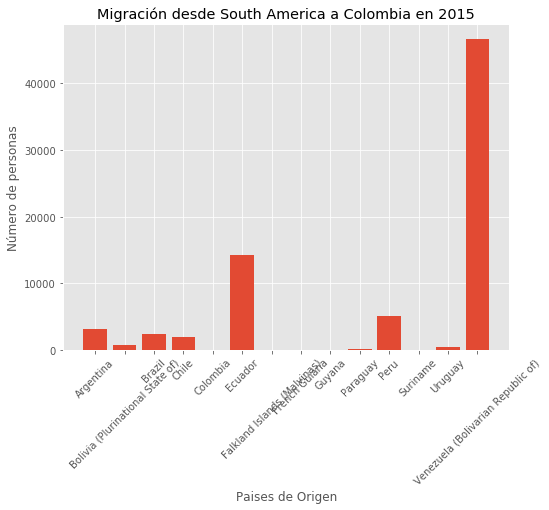

In [115]:
bar_plot("South America", 'Colombia', 2015, my_dict, countries)

<BarContainer object of 6 artists>

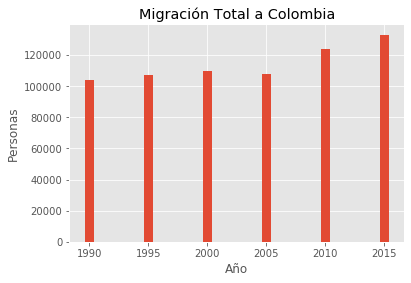

In [116]:
#
time_frame = [1990, 1995, 2000, 2005, 2010, 2015]
plt.title("Migración Total a Colombia")
plt.xlabel("Año")
plt.ylabel("Personas")
plt.bar(time_frame, extract_temporal_data("Colombia", my_dict))

<BarContainer object of 6 artists>

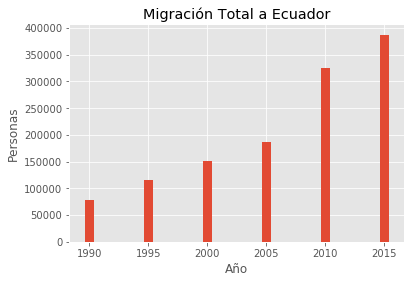

In [117]:
#
time_frame = [1990, 1995, 2000, 2005, 2010, 2015]
plt.title("Migración Total a Ecuador")
plt.xlabel("Año")
plt.ylabel("Personas")
plt.bar(time_frame, extract_temporal_data("Ecuador", my_dict))

<BarContainer object of 6 artists>

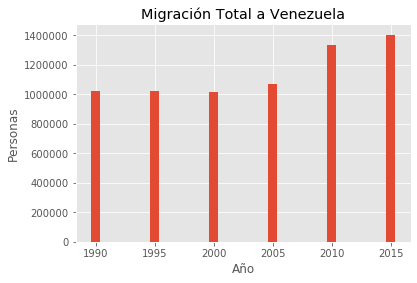

In [118]:
#
time_frame = [1990, 1995, 2000, 2005, 2010, 2015]
plt.title("Migración Total a Venezuela")
plt.xlabel("Año")
plt.ylabel("Personas")
plt.bar(time_frame, extract_temporal_data("Venezuela (Bolivarian Republic of)", my_dict))

In [119]:
def line_chart(origin, destination, my_dict,
               years=[1990, 1995, 2000, 2005, 2010, 2015], figsize=(8, 6)):
    """Plot migration as a line chart within a given time frame

    Keyword arguments:
    origin -- country or list of countries of origin
    destination -- country of destination
    years -- years under consideration
    my_dict -- data set that contains all migration data
    figsize -- size of the figure if should be adjusted
    """

    X = []

    # Extraemos los datos a graficar
    for year in years:
        X.append(year)
        X.append(my_dict[year].loc[destination, origin])

    X = np.array(X)
    sh = (len(years), 2)
    X = X.reshape(sh)

    # Configuramos parámetros
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use('ggplot')

    # Configuramos titulos
    title = "Migración desde " + origin + " a " + destination + \
        " Desde " + str(years[0]) + " a " + str(years[-1])
    ax.set_title(title)
    ax.set_ylabel("Número de personas migradas")
    ax.set_xlabel("Año")
    ax.plot(X[:, 0], X[:, 1])

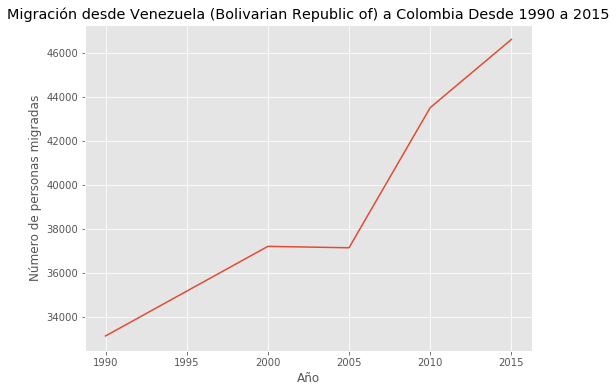

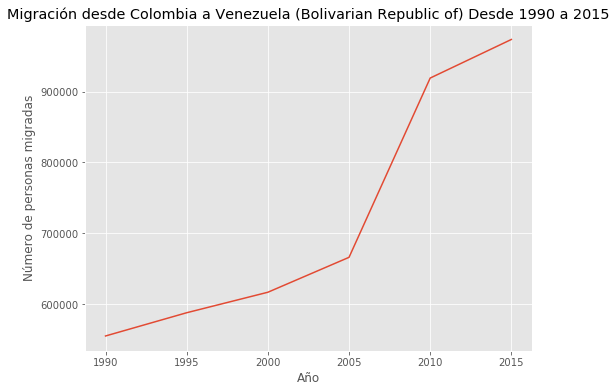

In [120]:
line_chart("Venezuela (Bolivarian Republic of)", "Colombia", my_dict)
line_chart("Colombia", "Venezuela (Bolivarian Republic of)", my_dict)

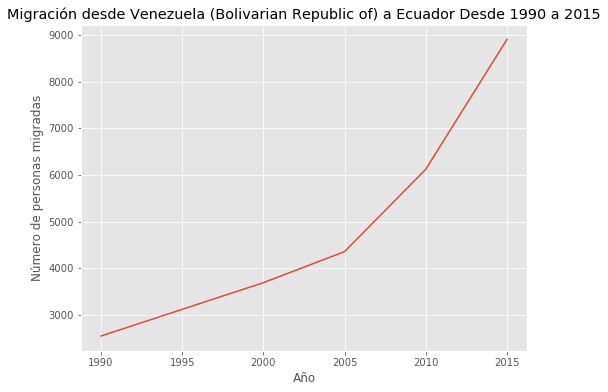

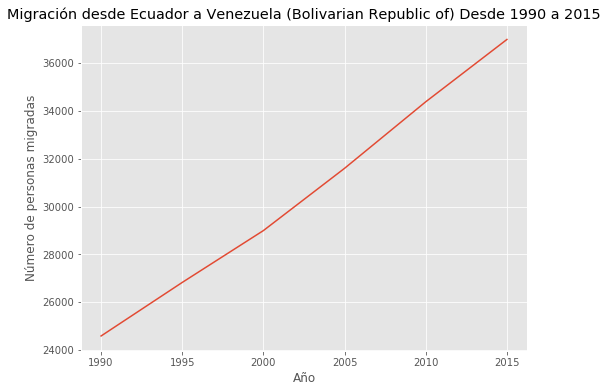

In [121]:
line_chart("Venezuela (Bolivarian Republic of)", "Ecuador", my_dict)
line_chart("Ecuador", "Venezuela (Bolivarian Republic of)", my_dict)

In [122]:
# Graficamos la migración total para la región desde un determinado país
def lines_chart(origins, destination, my_dict,
                years=[1990, 1995, 2000, 2005, 2010, 2015], figsize=(8, 6)):
    """Plot single or multiple line cahrts representing migration 
    from origin(-s) to destination within a given time frame

    Keyword arguments:
    origins -- country or countries of origin
    destination -- country of destination
    years -- years under consideration
    my_dict -- data set that contains all migration data
    figsize -- size of the figure if should be adjusted
    """

    x = []
    # Extraemos los datos a graficar
    for origin in origins:
        X = []
        for year in years:
            X.append(year)
            X.append(my_dict[year].loc[destination, origin])
        x.append(X)

    for i in range(len(x)):
        x[i] = np.array(x[i])
        sh = (len(years), 2)
        x[i] = x[i].reshape(sh)

    # Configuramos los parámetros
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use('ggplot')

    # Configuramos los titulos
    title = "Migración a " + destination + " Desde " + \
        str(years[0]) + " to " + str(years[-1])
    ax.set_title(title)
    ax.set_ylabel("Número de personas Migradas")
    ax.set_xlabel("Año")
    for i in range(len(x)):
        ax.plot(x[i][:, 0], x[i][:, 1])
    ax.legend(origins)

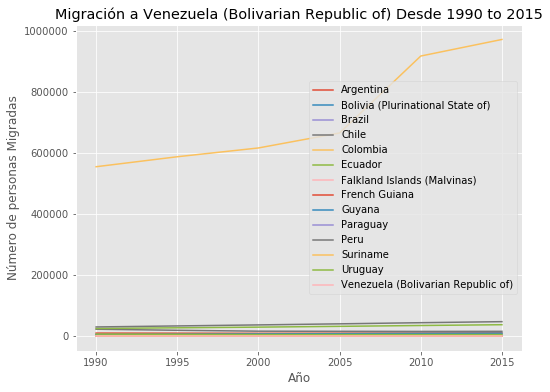

In [123]:
lines_chart(countries["South America"], "Venezuela (Bolivarian Republic of)", my_dict)

### Heatmap y Clúster Map

Para obtener una mejor visión general de alto nivel, se pueden utilizar dos formas de visualización de datos: Heatmap y mapa de Clúster Map. Para identificar los posibles grupos de países (según sus valores de migración). Una vez identificados los es posible identificar los responsables de la formulación de políticas a manera de establecer coaliciones o asociaciones.

In [124]:
# Hacemos un Heatmap por regiones
def migration_heatmap(origin, destination, year, my_dict, subregions, countries, scale=True):
    """Plot migration values as a heatmap

    Keyword arguemnts:
    origin -- region of origin (Asia, for example)
    destination -- region of destination (Europe, for example)
    year -- year of interest
    my_dict -- data set that contains all migration data
    subregions -- subregions dict created earlier
    countries -- countires dict created earlier
    scale -- make scaling or not
    """
    a = get_countries_from_region(origin, subregions, countries)
    b = get_countries_from_region(destination, subregions, countries)

    # Ajustamos el tamaño
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size

    X = my_dict[year].loc[b, a]

    if (scale == True):
        # Escalamos para una mejor representación
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
        X_train_minmax = min_max_scaler.fit_transform(X)
        xticks = X.columns.values
        yticks = X.index.values
        sns.heatmap(X_train_minmax, xticklabels=xticks,
                    yticklabels=yticks)
    else:
        sns.heatmap(X)

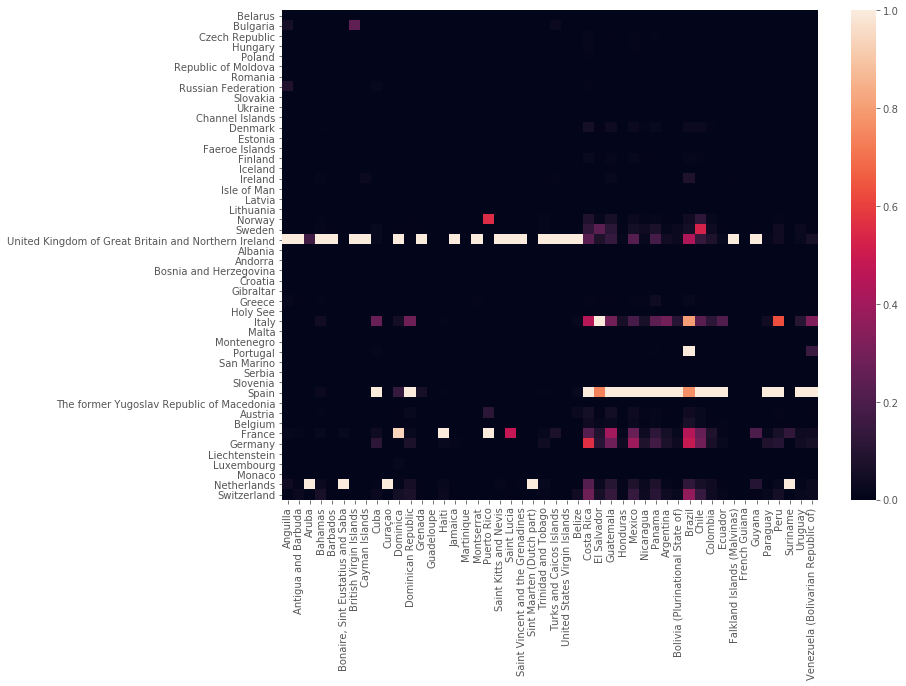

In [125]:
migration_heatmap("Latin America and the Caribbean", "Europe", 2015, my_dict, subregions, countries)

Un patrón interesante se puede observar aquí. Hay un par de países que están tomando un número significativo de inmigrantes de América del Sur: España principalmente para los paises americanos de habla castellana y para los paises de habla inglesa las naciones receptoras principalmente figuran Reino Unido y Holanda.

In [126]:
# Hacemos un Clustermap por regiones en este caso continuamos comparando la emigración desde América Latina a Europa

def migration_clustermap(origin, destination, year, my_dict, subregions, countries, scale = True) : 
    """Plot migration values as a clustermap
    
    Keyword arguemnts:
    origin -- region of origin (Asia, for example)
    destination -- region of destination (Europe, for example)
    year -- year of interest
    my_dict -- data set that contains all migration data
    subregions -- subregions dict created earlier
    countries -- countires dict created earlier
    scale -- make scaling or not
    """
    a = get_countries_from_region(origin, subregions, countries)
    b = get_countries_from_region(destination, subregions, countries)
    
    # Ajustamos el tamaño
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    
    X = my_dict[year].loc[b, a]
    
    if (scale == True) : 
        # Escalamos para una mejor representación
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
        X_train_minmax = min_max_scaler.fit_transform(X)
        xticks = X.columns.values
        yticks = X.index.values
        sns.clustermap(X_train_minmax, xticklabels=xticks,
                yticklabels=yticks)
    else : 
        sns.clustermap(X)

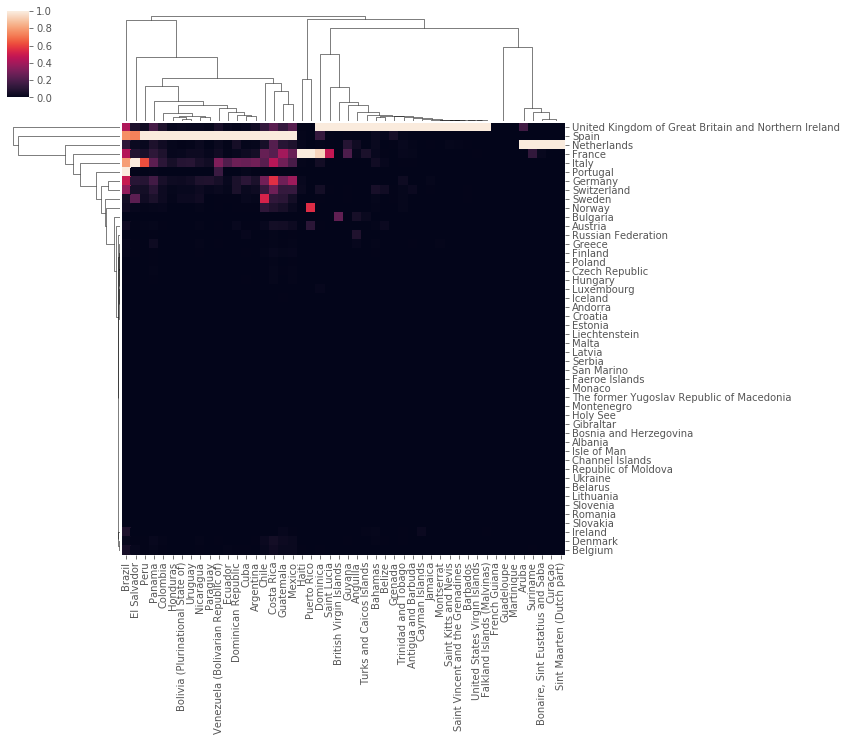

In [127]:
migration_clustermap("Latin America and the Caribbean", "Europe", 2015, my_dict, subregions, countries)

Ahora es posible observar cuáles son los grupos de países que experimentan los mayores flujos migratorios. Sin embargo, todos los países de origen estan asociados a su historia colonial. La migración a España, por ejemplo, es mayoritariamente de América Latina, mientras que la migración a Reino Unido e Irlanda proviene de sus extintas colonias, así como tambien sucede entre Brasil y Portugal.

### Migración neta del Banco Mundial (Banco Mundial, 2018)

El Banco Mundial es bien conocido por sus conjuntos de datos abiertos. El conjunto de datos de migración neta refleja la cantidad de personas que abandonan o ingresan al país en un año determinado. El conjunto de datos se descargó del Banco Mundial (2018) como archivo Excel en xls fromat. Los datos de todos los años y todos los países se encuentran almacenados en una sola hoja.

#### Preprocesamiento de los datos

In [128]:
# Origen de los datos
netm_df = pd.read_excel(
    "data/API_SM.POP.NETM_DS2_en_excel_v2_10182252.xls", sheet_name="Data")

In [131]:
# Datos
netm_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Net migration,SM.POP.NETM,NaN,NaN,-4323.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1253.0,NaN,NaN,NaN,NaN,1004.0
1,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,448007.0,NaN,NaN,NaN,NaN,-299999.0
2,Angola,AGO,Net migration,SM.POP.NETM,NaN,NaN,-135000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,87322.0,NaN,NaN,NaN,NaN,0.0
3,Albania,ALB,Net migration,SM.POP.NETM,NaN,NaN,-99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-93425.0,NaN,NaN,NaN,NaN,-40000.0
4,Andorra,AND,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Preprocesamiento del DataSet
netm_df.index = netm_df["Country Name"]
netm_df = netm_df.drop(columns=["Indicator Name", "Indicator Code"])

# Se eliminan datos irrelevantes
netm_df = netm_df.dropna(axis=1, how='all')

In [133]:
# Observamos el DataSet
netm_df.head()

,Country Name,Country Code,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
Country Name,,,,,,,,,,,,,,
Aruba,Aruba,ABW,-4323.0,-4275.0,-3537.0,-5470.0,-1921.0,-5194.0,14218.0,6926.0,6263.0,-441.0,1253.0,1004.0
Afghanistan,Afghanistan,AFG,-20000.0,-20000.0,-20000.0,-1092462.0,-3318301.0,-1484185.0,2327473.0,-379474.0,929118.0,-777497.0,448007.0,-299999.0
Angola,Angola,AGO,-135000.0,-226155.0,-80955.0,11455.0,234148.0,-151982.0,142811.0,-126955.0,172594.0,85286.0,87322.0,0.0
Albania,Albania,ALB,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-443212.0,-179606.0,-176774.0,-217358.0,-93425.0,-40000.0
Andorra,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploración de los datos

__Choropleth__

Un mapa coroplético nos brindará una visión espacial del conjunto de datos

In [134]:
# Cargamos los datos
g_df = gpd.read_file(
    "data/geo/ne_10m_admin_0_countries.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

In [135]:
# Utilizamos un elemento clave para unir el codigo de nombre del país con el shapefile utilizando Geopandas
netm_df = pd.read_excel(
    "data/API_SM.POP.NETM_DS2_en_excel_v2_10182252.xls", sheet_name="Data")
netm_df = netm_df.drop(columns=["Indicator Name", "Indicator Code"])
netm_df = netm_df.dropna(axis=1, how='all')

def plot_map(year):
    """Plot choropleth representing net migration by country. 

    Keyword arguments:
    year -- year of interest
    netm_df -- World Bank net migration data set
    g_df -- shapefiles in geopandas data frame
    """
    year = str(year)
    
    if year not in list(netm_df.columns):
        raise ValueError("This year is unavailable. Please, try another one.")

    clusters = 9  # número de agrupaciones
    cmap = "OrRd"  # Color
    figsize = (16, 10)  # Medidas
    cols = ["Country Name", "Country Code", year]
    title = "Migración Neta en " + year  # Titulo del mapa

    # Conectamos al shapefile
    merged_df = g_df.merge(
        netm_df[["Country Code", year]], left_on="ADM0_A3", right_on="Country Code")

    # Graficamos
    ax = merged_df.dropna().plot(column=year, cmap=cmap,
                                 scheme='equal_interval', figsize=figsize, k=clusters, legend=True)

    # Eliminamos datos irrelevantes
    merged_df[merged_df.isna().any(axis=1)].plot(
        ax=ax, color='#fafafa', hatch='...')

    # Configuramos ejes
    ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend().set_bbox_to_anchor((.12, .4))
    ax.get_figure()

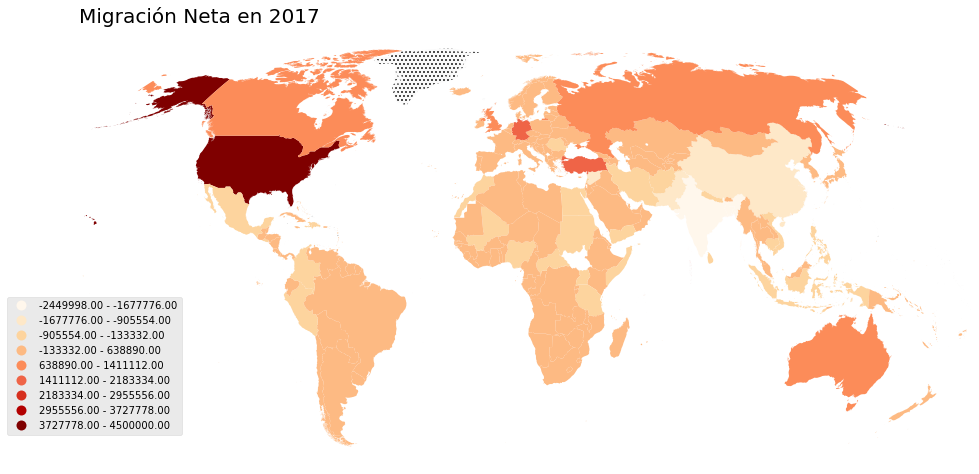

In [136]:
plot_map("2017")

#### Versión  Interactiva

Modificando un poco el código es posible crear una visualización interactiva bajo el esquema de serie de tiempo para ver la evolución de los valores de Migración Neta anuales

In [137]:
from ipywidgets import interactive
years = netm_df.columns[2:]
step = 5
start = int(years[0])
end = int(years[-1])
interactive_plot = interactive(plot_map, year=(start, end, step))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=1987, description='year', max=2017, min=1962, step=5), Output(layout=Lay…

### Heatmap y Clúster Map

In [138]:
# Agregamos los datos para diseñar el Heatmap y el Clústermap 
netm_df = pd.read_excel(
    "data/API_SM.POP.NETM_DS2_en_excel_v2_10182252.xls", sheet_name="Data")
netm_df.index = netm_df["Country Name"]
netm_df = netm_df.drop(
    columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])
netm_df.columns = [int(i) for i in list(netm_df.columns)]
netm_df = netm_df.dropna(axis=1, how='all')
netm_df = netm_df.dropna(axis=0, how='all')


def netmigration_chmap(countries, netm_df, flag):
    """Plot net migration values as a heatmap or clustermap

    Keyword arguemnts:
    countries -- list of countries to show
    netm_df -- data set with net migration values
    flag -- 1 if heatmap and 2 if clustermap
    """

    # Ajustamos medidas
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size

    X = netm_df.loc[countries, :].fillna(0)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_train_minmax = min_max_scaler.fit_transform(X)
    xticks = X.columns.values
    yticks = X.index.values
    if flag == 1:
        sns.heatmap(X_train_minmax, xticklabels=xticks,
                    yticklabels=yticks)
    elif flag == 2:
        sns.clustermap(X_train_minmax, xticklabels=xticks,
                       yticklabels=yticks)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


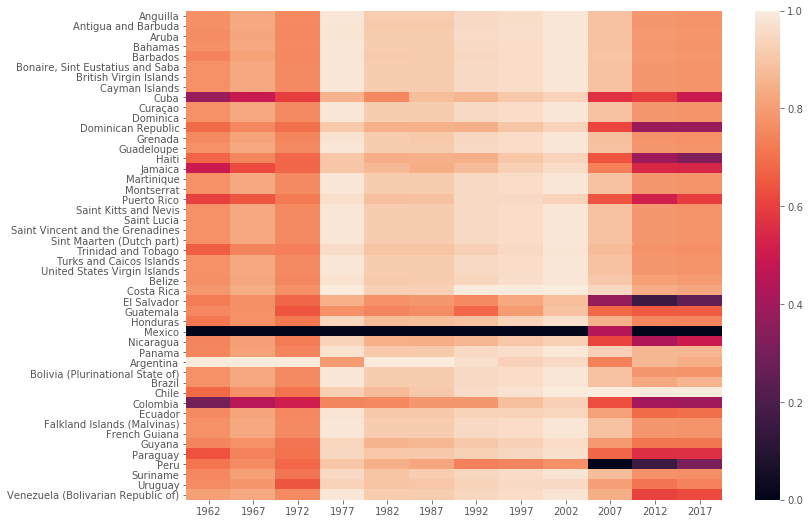

In [139]:
netmigration_chmap(America, netm_df, 1)

Parece que Chile ha dominado la recepcción del flujo de inmigración 

### Indice de Estado Frágil 

El índice de estado frágil (FSI) es un informe anual realizado por el Fund for Peace del Fondo para la Paz. Este informe se basa en un conjunto de 12 indicadores que se utilizan para caracterizar la vulnerabilidad de los países al conflicto o colapso. Los indicadores se dividen en 4 categorías:
* cohesión,
* económico,
* político,
* sociales.

Todos los indicadores se nombran de manera que sean intuitivamente comprensibles. Los valores de los indicadores varían en la escala de 0 a 10, donde 0 es absolutamente estable y 10 es altamente vulnerable. Todos los indicadores se suman al puntaje FSI total que se utiliza para la clasificación de los países. Dependiendo de la puntuación los países se dividen en 4 categorías:
* alerta,
* advertencia,
* estable,
* sostenible.

Hay un proceso complejo detrás del cálculo de estos indicadores. Para más detalles y críticas ver el Fondo para la Paz (2018).

Nuestra hipótesis aquí es que estos indicadores pueden __explicar__ la migración hacia o desde un determinado país, y por lo tanto, pueden usarse para nuestros modelos estadísticos. El conjunto de datos es un conjunto de países e indicadores correspondientes.

#### Pre-procesamiento

In [140]:
fsi_years = list(range(2006, 2018))  # Años disponibles
file_name = "fsi-"  # archivos
extension = ".xlsx"

fsi_dict = {}  # estructura de los DataSet

# Leemos los archivos en Pandas
for i in range(len(fsi_years)):
    path = "data/" + file_name + str(fsi_years[i]) + extension
    fsi_dict[fsi_years[i]] = pd.read_excel(path)

# Ajustamos los datos por país y año
for key, values in fsi_dict.items():
    fsi_dict[key].index = fsi_dict[key].Country
    fsi_dict[key] = fsi_dict[key].drop(columns=['Country', 'Year'])

In [141]:
# Resultado
fsi_dict[2010].head(5)

,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
Country,,,,,,,,,,,,,,
Somalia,1st,114.3,10.0,10.0,9.7,9.6,8.0,8.3,10.0,9.6,9.9,9.6,10.0,9.6
Chad,2nd,113.3,9.9,9.8,9.8,8.5,9.3,8.3,9.9,9.6,9.6,9.4,9.5,9.7
Sudan,3rd,111.8,9.8,9.9,9.9,6.7,9.5,8.7,9.9,9.3,9.9,8.8,9.8,9.6
Zimbabwe,4th,110.2,9.2,9.5,8.8,9.6,9.4,9.7,9.6,9.4,9.5,9.4,8.6,7.5
Congo Democratic Republic,5th,109.9,9.8,8.9,8.6,8.7,9.5,8.0,8.8,9.0,9.4,9.9,9.6,9.7


In [142]:
def extract_temporal_fsi_data(country, fsi_dict, years=list(range(2006, 2018))):
    """Extract FSI values for a given time frame

    Keyword arguments
    country -- country of interest
    fsi_dict -- data set that contains all FSI data
    years -- years under consideration
    """
    d = {}
    for year in years:
        if country in fsi_dict[year].index:
            d[year] = fsi_dict[year].loc[country, "Total":].values
    return d


pprint(extract_temporal_fsi_data("Colombia", fsi_dict))

{2006: array([91.8, 9.0, 9.2, 7.4, 3.2, 8.5, 8.5, 8.7, 6.5, 7.6, 7.0, 9.1, 7.1],
      dtype=object),
 2007: array([89.7, 8.3, 8.5, 7.4, 3.8, 8.4, 8.4, 8.2, 6.0, 7.4, 6.8, 9.5, 7.0],
      dtype=object),
 2008: array([89.0, 8.0, 8.3, 7.4, 3.8, 8.4, 8.4, 7.9, 6.0, 7.2, 6.8, 9.2, 7.6],
      dtype=object),
 2009: array([89.2, 7.5, 8.0, 7.2, 4.3, 8.5, 8.5, 7.9, 6.0, 7.2, 6.9, 9.2, 8.0],
      dtype=object),
 2010: array([88.2, 7.7, 8.0, 7.2, 4.6, 8.3, 8.3, 7.7, 5.8, 6.9, 6.7, 9.0, 8.0],
      dtype=object),
 2011: array([87.0, 7.5, 8.0, 7.5, 4.1, 8.6, 7.9, 7.5, 5.6, 7.2, 6.7, 8.7, 7.7],
      dtype=object),
 2012: array([84.4, 7.0, 7.7, 7.2, 4.0, 8.4, 7.6, 7.4, 5.9, 7.0, 6.4, 8.4, 7.4],
      dtype=object),
 2013: array([83.8, 6.8, 7.7, 7.5, 3.8, 8.1, 7.3, 7.3, 6.1, 7.3, 6.5, 8.3, 7.1],
      dtype=object),
 2014: array([83.1, 7.0, 7.7, 7.7, 4.1, 7.8, 7.0, 7.4, 6.3, 7.1, 6.2, 8.0, 6.8],
      dtype=object),
 2015: array([82.5, 7.3, 7.6, 8.0, 3.8, 7.5, 6.7, 7.1, 6.0, 7.3, 6.9, 7.8, 6.5],
 

In [143]:
def extract_total_fsi_country(country, fsi_dict, years=list(range(2006, 2018))):
    """Extract total FSI score for a given time frame

    Keyword arguments
    country -- country of interest
    fsi_dict -- data set that contains all FSI data
    years -- years under consideration
    """
    l = []
    for year in years:
        if country in fsi_dict[year].index:
            l.append(fsi_dict[year].loc[country, "Total"])
    return l


extract_total_fsi_country("Ecuador", fsi_dict)

[81.2, 79.9, 80.3, 81.2, 81.7, 82.2, 80.1, 78.6, 77.3, 75.9, 75.6, 77.3]

In [144]:
def extract_total_fsi_countries(countries, fsi_dict, years=list(range(2006, 2018))):
    """Extract total FSI scores for specified countries in a given time frame

    Keyword arguments
    countries -- countries of interest
    fsi_dict -- data set that contains all FSI data
    years -- years under consideration
    """
    d = {}
    for country in countries:
        l = []
        for year in years:
            if country in fsi_dict[year].index:
                l.append(fsi_dict[year].loc[country, "Total"])
        d[country] = l
    
    # Check for the countries with no values
    res = {}
    for country, value in d.items():
        if len(value) != 0 :
            res[country] = value
    return res


pprint(extract_total_fsi_countries(["Colombia", "Ecuador"], fsi_dict))

{'Colombia': [91.8,
              89.7,
              89.0,
              89.2,
              88.2,
              87.0,
              84.4,
              83.8,
              83.1,
              82.5,
              80.2,
              78.9],
 'Ecuador': [81.2,
             79.9,
             80.3,
             81.2,
             81.7,
             82.2,
             80.1,
             78.6,
             77.3,
             75.9,
             75.6,
             77.3]}


#### Exploración de los datos

In [145]:
def fsi_lines_chart(countries, fsi_dict, years=list(range(2006, 2018)), figsize=(10, 8)):
    """

    Keyword arguments:
    """
    data = extract_total_fsi_countries(countries, fsi_dict)
    
    fig, ax = plt.subplots(figsize=figsize)
    title = "Total FSI Valor"
    ax.set_title(title)
    ax.set_ylabel("Valores FSI")
    ax.set_xticks(np.arange(len(years)))
    ax.set_xticklabels(years)
    ax.set_xlabel("Año")
   
    for country in data:
        ax.plot(data[country])
    loc = "upper right" 
    ax.legend(data.keys(), loc = loc)

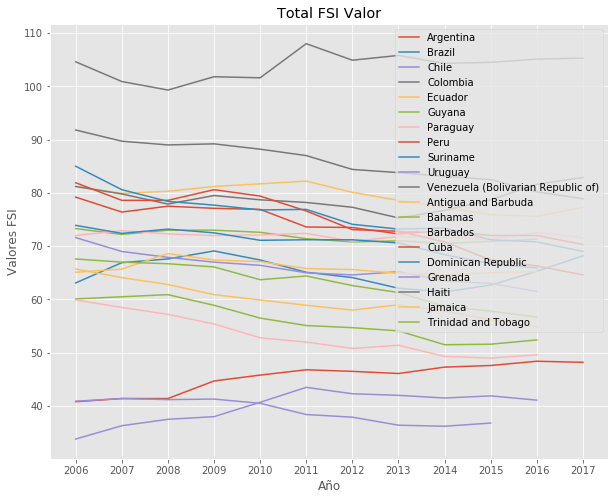

In [146]:
fsi_lines_chart(countries["South America"] + countries["Caribbean"], fsi_dict)

Desde este gráfico de líneas podemos ver el descenso de la puntuación total del FSI para Venezuela

### Algoritmos

### Ajuste de curvas e interpolación.

En el conjunto de datos de migración neta actual no hay suficientes puntos de datos para hacer un modelo de regresión "bueno". Para superar este problema, se decidió asumir que los puntos faltantes se podrían completar mediante el ajuste de la curva y la interpolación.

#### Migración Neta

__scipy.optimize.curve_fit__

[1962. 1967. 1972. 1977. 1982. 1987. 1992. 1997. 2002. 2007. 2012. 2017.]
[ 18874.   3172.    892.   1094.   1373.    891.   -572.  -2061.  -7648.
 -28395. -69121. -60493.]
[ 0.01396548  0.19975607 -0.23645484  0.37829397  0.27261257 -0.23002483
 -0.00062084  0.16110373 -0.24748592  0.02109093 -0.01062147 -0.28248809]
[ 18874.01396548   3172.19975607    891.76354516   1094.37829397
   1373.27261257    890.76997517   -572.00062084  -2060.83889627
  -7648.24748592 -28394.97890907 -69121.01062147 -60493.28248809]
[ 5.57968785e-03 -4.59478350e+01  1.41686948e+05 -1.93925591e+08
  9.94110518e+10]


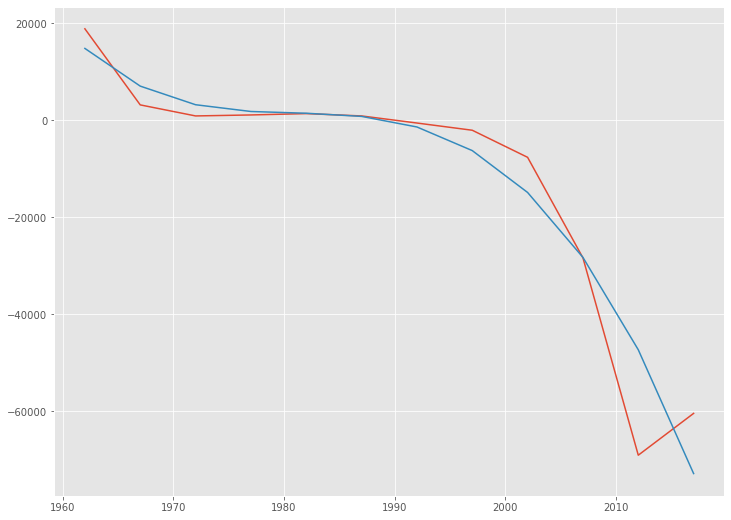

In [148]:
from scipy.optimize import curve_fit
xdata = list(netm_df.columns)
xdata = [float(x) for x in xdata]
xdata = np.array(xdata)
print(xdata)
y = netm_df.loc["Venezuela (Bolivarian Republic of)", "1962":].values
y = np.array(y, dtype="float64")
print(y)

# Estimamos
y_noise = 0.2 * np.random.normal(size=xdata.size)
print(y_noise)
ydata = y + y_noise
print(ydata)

# Graficamos
plt.plot(xdata, ydata)

# Definimos las funciones 
#     return a * x**3 + b * x**2 + c * x + d

def my_func(x, a, b, c, d, e) : 
     return a * x**4 + b * x**3 + c * x**2 + d * x + e

popt, pcov = curve_fit(my_func, xdata, ydata)
print(popt)
plt.plot(xdata, my_func(xdata, *popt))

In [149]:
def replicate_the_graph(country, netm_df):
    """Replicate the graph piece by piece

    Keyword arguments:
    country -- country of interest
    netmd_df -- net migration data set
    """

    years = list(netm_df.columns)
    for i in range(0, len(years) - 1):
        x1 = years[i]  # fix the first period
        x2 = years[i + 1]

        xdata = []
        xdata.extend((x1, x2))
        xdata = [float(x) for x in xdata]
        xdata = np.array(xdata)

        z1 = str(x1)
        z2 = str(x2)

        ydata = netm_df.loc[country, z1:z2].values
        ydata = np.array(ydata, dtype="float64")

        def first_order(x, a, b):  # Agregamos una funcion lineal para los datos faltantes
            return a * x + b

        popt, pcov = curve_fit(first_order, xdata, ydata)  # ajustamos la curva
        plt.plot(xdata, first_order(xdata, *popt))  # graficamos el resultado

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of t

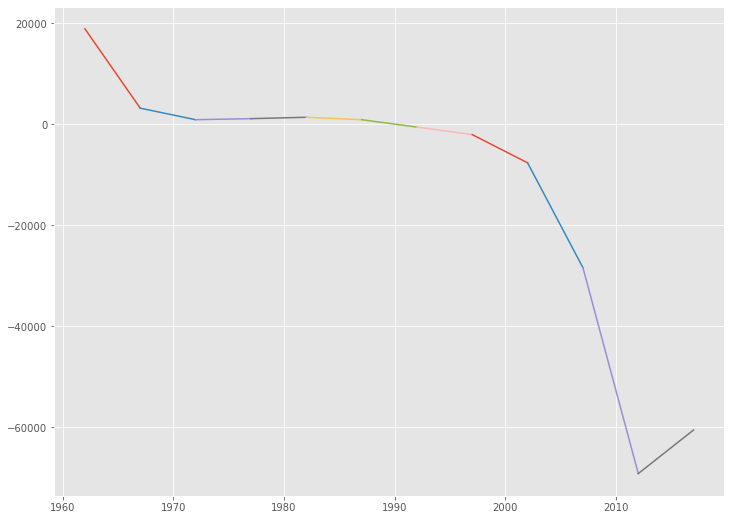

In [151]:
replicate_the_graph("Venezuela (Bolivarian Republic of)", netm_df)
# Compare with original one
# plt.plot(xdata, ydata)

__scipy.interpolate__

In [152]:
from scipy.interpolate import interp1d


def interpolate_net_migration(countries, netm_df):
    """Interpolate net migration data
    
    Keyword arguments:
    countries -- list of countries of interest
    netm_df -- data set with net migration values
    """
    xdata = list(netm_df.columns)
    xdata = [int(x) for x in xdata]
    xdata = np.array(xdata)
    start = xdata[0]
    end = xdata[-1]
    xnew = list(range(start, end + 1)) # definimos los rangos
    d = {}

    for country in countries:
        ydata = netm_df.loc[country, "1962":].values
        ydata = np.array(ydata, dtype="float64")
        f = interp1d(xdata, ydata)
        d[country] = f(xnew)

    res = pd.DataFrame(data=d).T
    res.columns = xnew

    return res

netm_df_inter = interpolate_net_migration(list(netm_df.index), netm_df)


netm_df_inter.head()

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Aruba,-4323.0,-4313.4,-4303.8,-4294.2,-4284.6,-4275.0,-4127.4,-3979.8,-3832.2,-3684.6,...,-102.2,236.6,575.4,914.2,1253.0,1203.2,1153.4,1103.6,1053.8,1004.0
Afghanistan,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,...,-532396.2,-287295.4,-42194.6,202906.2,448007.0,298405.8,148804.6,-796.6,-150397.8,-299999.0
Angola,-135000.0,-153231.0,-171462.0,-189693.0,-207924.0,-226155.0,-197115.0,-168075.0,-139035.0,-109995.0,...,85693.2,86100.4,86507.6,86914.8,87322.0,69857.6,52393.2,34928.8,17464.4,0.0
Albania,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-192571.4,-167784.8,-142998.2,-118211.6,-93425.0,-82740.0,-72055.0,-61370.0,-50685.0,-40000.0
Arab World,-502251.0,-570005.6,-637760.2,-705514.8,-773269.4,-841024.0,-846902.8,-852781.6,-858660.4,-864539.2,...,3443856.4,2735085.8,2026315.2,1317544.6,608774.0,378114.0,147454.0,-83206.0,-313866.0,-544526.0


Comparando ambos algoritmos los resultados bastante similares. En este caso sese utilizarán los datos del segundo modelo debido a la simplicidad del algoritmo.

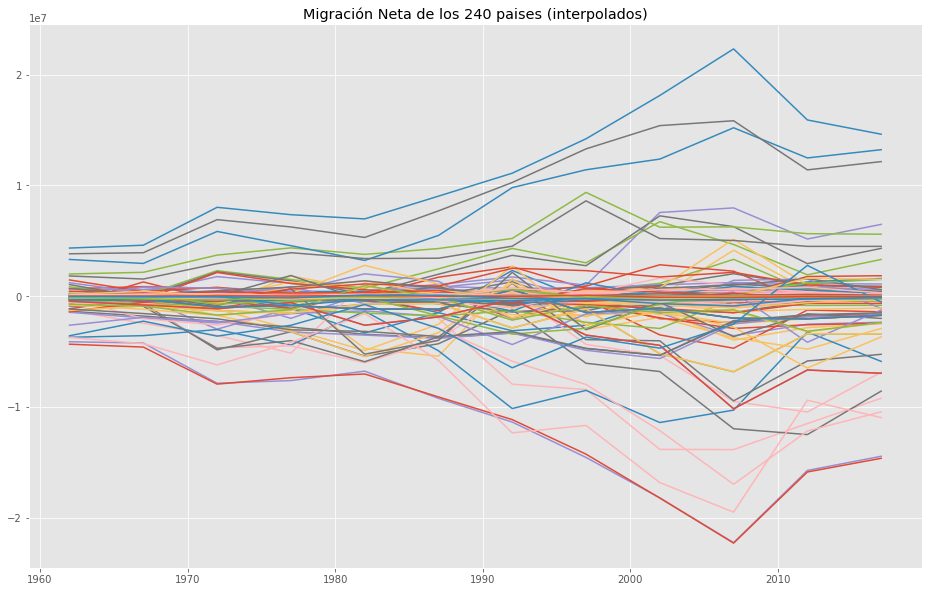

In [153]:
# Interpolación de todo el DataSet
netm_df_inter.T.plot(legend=False, figsize=(16,10), title="Migración Neta de los 240 paises (interpolados)")

In [155]:
def extrapolate_net_migration(countries, netm_df):
    """Extrapolate net migration data

    Keyword arguments:
    countries -- list of countries of interest
    netm_df -- data set with net migration values
    """
    xdata = list(netm_df.columns)
    xdata = [int(x) for x in xdata]
    xdata = np.array(xdata)
    start = xdata[0]
    end = xdata[-1]
    xnew = list(range(start, 2039))  # definimos los nuevos rangos
    d = {}

    for country in countries:
        ydata = netm_df.loc[country, "1962":].values
        ydata = np.array(ydata, dtype="float64")
        
        f = interp1d(xdata, ydata, fill_value="extrapolate")
        d[country] = f(xnew)

    res = pd.DataFrame(data=d).T
    res.columns = xnew

    return res


netm_df_extr = extrapolate_net_migration(list(netm_df.index), netm_df)

# creamos el nuevo DataSet
netm_df_extr.head(5)

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038
Aruba,-4323.0,-4313.4,-4303.8,-4294.2,-4284.6,-4275.0,-4127.4,-3979.8,-3832.2,-3684.6,...,406.4,356.6,306.8,257.0,207.2,157.4,107.6,57.8,8.0,-41.8
Afghanistan,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,...,-2095213.4,-2244814.6,-2394415.8,-2544017.0,-2693618.2,-2843219.4,-2992820.6,-3142421.8,-3292023.0,-3441624.2
Angola,-135000.0,-153231.0,-171462.0,-189693.0,-207924.0,-226155.0,-197115.0,-168075.0,-139035.0,-109995.0,...,-209572.8,-227037.2,-244501.6,-261966.0,-279430.4,-296894.8,-314359.2,-331823.6,-349288.0,-366752.4
Albania,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,88220.0,98905.0,109590.0,120275.0,130960.0,141645.0,152330.0,163015.0,173700.0,184385.0
Arab World,-502251.0,-570005.6,-637760.2,-705514.8,-773269.4,-841024.0,-846902.8,-852781.6,-858660.4,-864539.2,...,-3312446.0,-3543106.0,-3773766.0,-4004426.0,-4235086.0,-4465746.0,-4696406.0,-4927066.0,-5157726.0,-5388386.0


In [156]:
# Graficamos la extrapolación 
def plot_extrapol_netm(countries, netm_df_extr) : 
    """
    
    Keyword arguments:
    """
    df = netm_df_extr.reindex(countries).loc[:,2017:].T
    df = df.dropna(axis=1, how="all")

    ax = df.plot()
    for line, name in zip(ax.lines, df.columns) : 
        y = line.get_ydata()[-1]
        ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

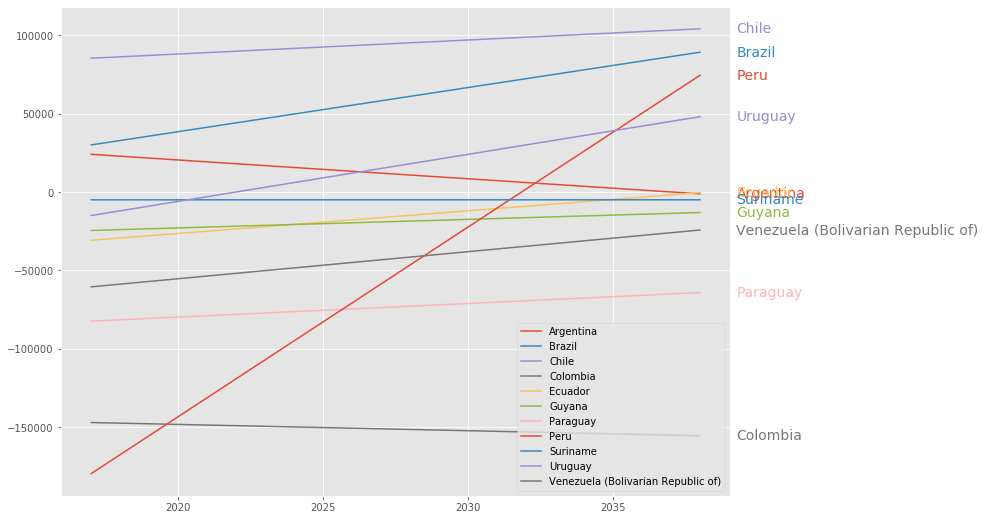

In [157]:
plot_extrapol_netm(countries["South America"], netm_df_extr)

Nuestro modelo predice los paises receptores de migración hasta el 2035, sin embargo se ajustara a un modelo de regresión lineal múltiple

### Regresión Lineal Múltiple

Para realizar una regresión lineal múltiple se deben cumplir varios requisitos. Por ejemplo,

* relaciones lineales entre la variable predictiva y los predictores (se puede probar el diagrama de dispersión en caso de un predictor),
* los residuos deberían distribuirse normalmente (las pruebas estadísticas podrían ayudar)
* no multicolinealidad (puede ser probado por la matriz de correlación);

Revisaremos estos requisitos uno por uno y (si es necesario) trataremos de encontrar una manera de superar las violaciones.

#### Requisitos del modelo

__Scatter plot__ Identificar tipo de relaciones y distribuciones de residuos.

Para simplificar la tarea, solo observaremos las relaciones entre el puntaje total del FSI y la migración neta. Por otra parte, la trama fue creada solo para el año 2017. En teoría, esta prueba debería ser mucho más completa. Sin embargo, incluso esta modificación no parece prometedora. Primero hay un par de atípicos. Además, las relaciones difícilmente pueden ser nombradas como lineales. Además, la distribución de residuos pudiera ser cuestionable.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_col

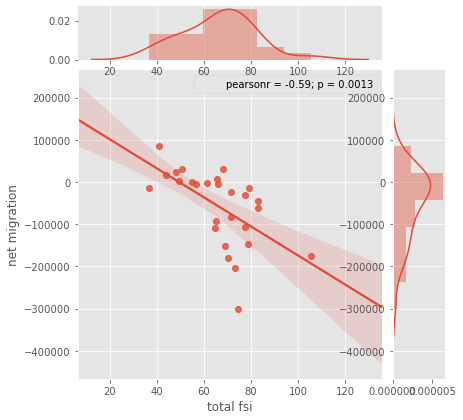

In [161]:
x = fsi_dict[2017].reindex(America)
x = x.loc[:, "Total"].dropna(axis=0, how="all")

y = netm_df.reindex(America)
y = y.loc[:, 2017].dropna(axis=0, how="all")

idx1 = x.index
idx2 = y.index
common_countries = idx1.intersection(idx2)
x = x.loc[common_countries]
y = y.loc[common_countries]
d = {"total fsi": x, "net migration": y}
# Creamos la función donde d = {"net migration" : y, "total fsi" : x}
df = pd.DataFrame(d)
# ax = sns.regplot(x="total fsi", y="net migration", data=df)
sns.jointplot(x="total fsi", y="net migration", data=df, kind="reg")

__Detección de Outlier__

In [162]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean")
  # min_samples = 3,
#   n_jobs = -1)
clusters = outlier_detection.fit_predict(df)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

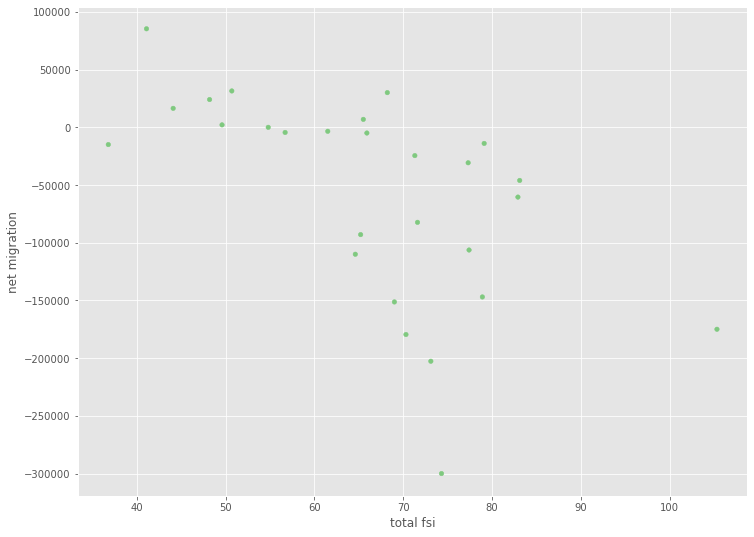

In [163]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df.plot.scatter(
  x = "total fsi",
  y = "net migration",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

__Heatmap__ para el coeficiente de correlación Pearson

Siguiendo la simplificación formulada previamente, aquí examinaremos solo los datos de 2017. Como los valores del heamap muestran que hay una multicolinealidad.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


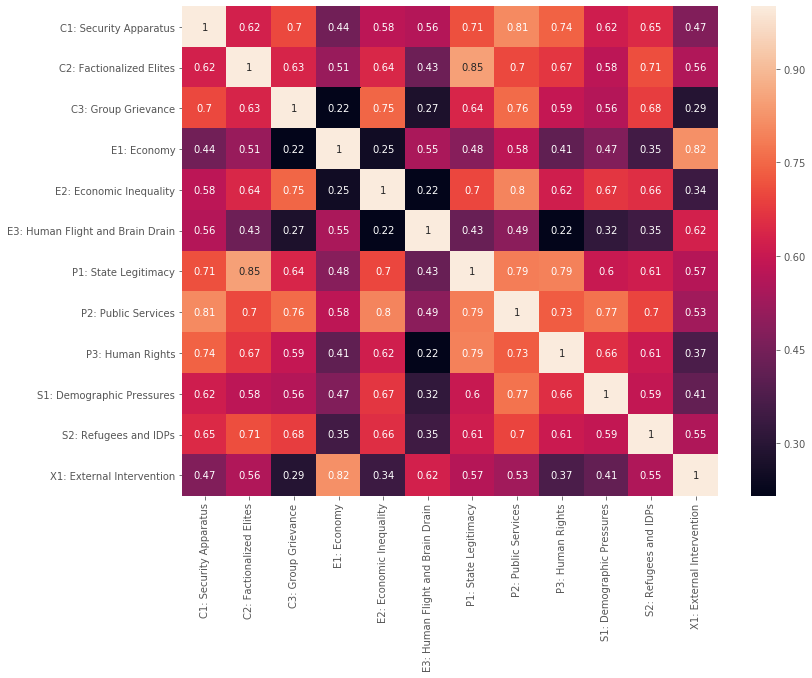

In [164]:
sns.heatmap(fsi_dict[2017].loc[America,"C1: Security Apparatus":].corr(), annot=True)

En general, los requisitos del método no se pueden satisfacer completamente. Es difícil dirigirnos hasta qué punto estaban satisfechos. Sin embargo, por el bien del análisis de datos exploratorios, se concluyó que realizaría con el método elegido.

### Preparación de los datos

In [167]:
# Preparación para el año 2017
year = 2017
x = fsi_dict[year].reindex(America)
x = x.loc[:, "C1: Security Apparatus":].dropna(axis=0, how="all")

y = netm_df.reindex(America)
y = y.loc[:, year].dropna(axis=0, how="all")

idx1 = x.index
idx2 = y.index
common_countries = idx1.intersection(idx2)
x = x.loc[common_countries]
y = y.loc[common_countries]
df = pd.DataFrame(x)
df.insert(loc=0, column="Net migration", value=y)

X = df.loc[:,"C1: Security Apparatus":]
y = df["Net migration"].values

#### Ejecutar el algoritmo

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Aplicamos el algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict y
y_pred = regressor.predict(X_test)

# imprimos la métricas
print('Intercept : ', regressor.intercept_)
print('R-Squared : ', metrics.r2_score(y_test, y_pred))
print('Explained variance : ', metrics.explained_variance_score(y_test, y_pred)) 
print('Mean absoulute error : ', metrics.mean_absolute_error(y_test, y_pred)) 

Intercept :  -127227.60367757271
R-Squared :  -3.1997062985121447
Explained variance :  -2.161970097371571
Mean absoulute error :  118528.5846197405


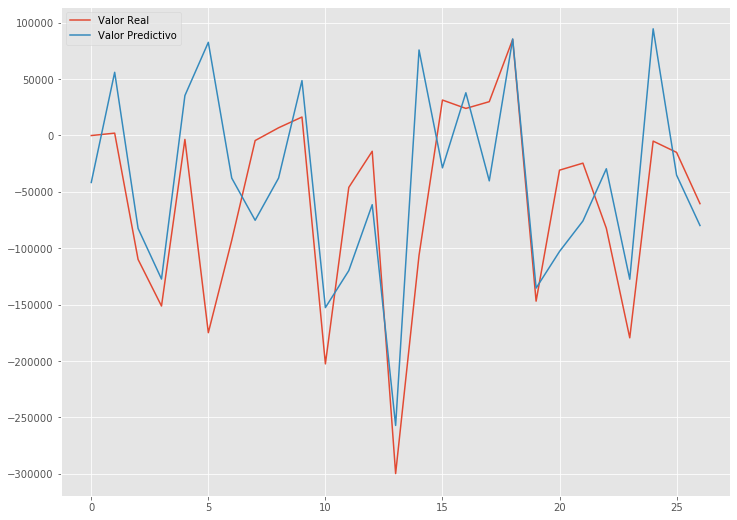

In [169]:
plt.plot(y, label = "Valor Real")
plt.plot(regressor.predict(X), label = "Valor Predictivo")
plt.legend(loc='best')

#### Serie de Tiempo

Lo que podemos hacer es considerar el conjunto de datos dados como series de tiempo. Es decir, tenemos múltiples valores para varios años. Tratemos de examinar las medidas de rendimiento en este caso. Nuestra hipótesis aquí es que serán mejores.

In [171]:
y_pred = []
y_true = []

for key, values in fsi_dict.items() : 
    x = fsi_dict[key].reindex(America)
    x = x.loc[:, "C1: Security Apparatus":].dropna(axis=0, how="all")

    y = netm_df_inter.reindex(America)
    y = y.loc[:, key].dropna(axis=0, how="all")

    idx1 = x.index
    idx2 = y.index
    common_countries = idx1.intersection(idx2)
    x = x.loc[common_countries]
    y = y.loc[common_countries]
    df = pd.DataFrame(x)
    df.insert(loc=0, column="Net migration", value=y)

    X = df.loc[:,"C1: Security Apparatus":].values
    y = df["Net migration"].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
     
    model = LinearRegression()
    model.fit(X_train, y_train)
 
    y_pred.append(model.predict(X_test))
    y_true.append(y_test)

In [172]:
def mape(y_pred, y_true):
    """Mean Absolute Percentage Error
    
    Keywords arguments:
    y_pred -- predicted values
    y_true -- true values
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [173]:
from sklearn.metrics import mean_absolute_error
m_abs = 0
m_abs_perc = 0
n = len(y_pred)
for i in range(1, n) : # calcular metricas
    m_abs += mean_absolute_error(y_pred[i], y_true[i])
    m_abs_perc = mape(y_pred[i], y_true[i]) 
m_abs /= n # dar promedio
m_abs_perc /= n
print('Mean Absolute Error', m_abs)
print('Mean Absolute Percentage Error', m_abs_perc)

Mean Absolute Error 131648.14153860716
Mean Absolute Percentage Error 37.94131296742367


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Las métricas de rendimiento calculadas no nos proporcionan una confianza en los resultados del algoritmo. Como se esperaba, la regresión lineal múltiple no funcionó bien para una tarea determinada.

#### Modelo de regresión con vectores de soporte

El análisis de vectores de soporte (SVM) es una herramienta popular de aprendizaje automático para la clasificación y la regresión, identificado por Vladimir Vapnik y sus colegas en 1992. La regresión de la SVM (SVR) se considera una técnica no paramétrica porque se basa en las funciones del kernel.

In [174]:
from sklearn.svm import SVR
X = df.loc[:,"C1: Security Apparatus":].values
y = df["Net migration"].values

y = y.reshape(-1, 1)

sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y).ravel()

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
print('R-Squared', regressor.score(X, y))

# Getting the results
y_pred = regressor.predict(X)
# y_pred = sc_y.inverse_transform(y_pred)

R-Squared 0.7076590075791271


Una vez más, R-squared demuestra un mejor rendimiento del algoritmo. La gráfica de abajo parece un poco mejor. Los valores pronosticados casi replican los reales. Probablemente, los valores atípicos afectados resultados significativamente.

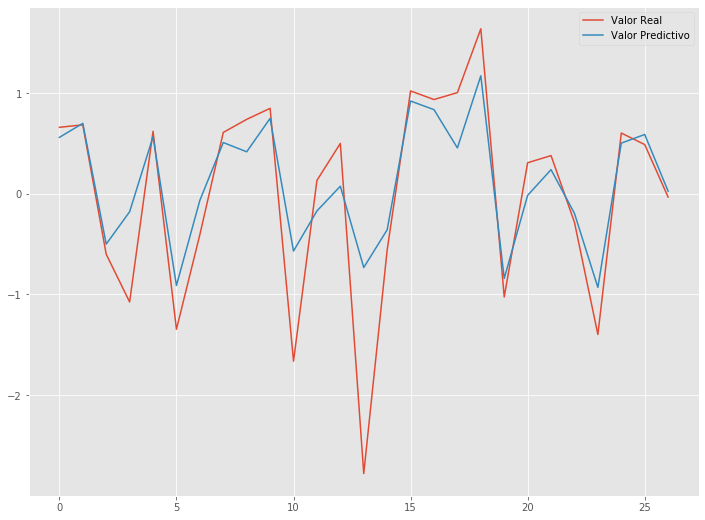

In [175]:
plt.plot(y, label = "Valor Real")
plt.plot(regressor.predict(X), label = "Valor Predictivo")
plt.legend(loc='best')

## Comparación

En resumen, los modelos de System Dynamics (SD) describen sistemas complejos y constan de stocks, flujos y ciclos de retroalimentación (Pruyt, 2013). Detrás de estos conceptos, hay conjuntos de ecuaciones diferenciales especificadas por los modeladores. Los modelos de System Dynamics son modelos de simulación, por lo que el comportamiento de un sistema complejo dado se puede observar a lo largo del tiempo. Como cualquier otro tipo de modelo, los modelos de System Dynamics tienen un propósito. En la investigación realizada por Wigman (2018), se construyó un modelo de dinámica de sistemas para "predecir" los flujos migratorios a nivel mundial. Por lo tanto, los resultados de este modelo son adecuados para la comparación con el trabajo realizado anteriormente. Como resultado del modelo de simulación se recibió un archivo de Excel. Este archivo es bastante similar en términos de contenido con el conjunto de datos de la población migrante de las Naciones Unidas. Es decir, hay valores de migración por país de origen y destino. La predicción se realizará desde 2019 hasta 2039.

In [177]:
# Cargamos los datos
sd_df = pd.read_excel("data/EUClosed.xlsx")
years = list(sd_df.columns[2:].values)

In [178]:
# Observamos el resultado
sd_df.head()

,Destination,Origin,2017,2019,2021,2023,2025,2027,2029,2031,2033,2035,2037,2039
0,American Samoa,American Samoa,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000
1,American Samoa,Australia,0,60.9365,120.6280,179.0570,235.9250,290.8090,343.2330,394.7920,448.2220,504.1250,562.693,624.077
2,American Samoa,Brunei Darussalam,0,10.3461,20.6437,31.0903,41.7523,52.6682,63.8562,75.3269,87.0878,99.1458,111.507,124.180
3,American Samoa,China,0,43651.1000,86777.8000,129895.0000,173215.0000,216811.0000,260699.0000,304880.0000,349352.0000,394110.0000,439151.000,484468.000
4,American Samoa,Fiji,0,88.9295,175.5730,262.3470,350.3080,440.0370,531.7830,625.6600,721.7320,820.0480,920.655,1023.600


In [179]:
def plot_netm_sd(countries, sd_df) : 
    """
    
    """
    by_dest = sd_df.loc[sd_df["Destination"].isin(countries),:]
    by_dest = by_dest.groupby("Destination").sum().reset_index()

    by_orig = sd_df.loc[sd_df["Origin"].isin(countries),:]
    by_orig = by_orig.groupby("Origin").sum().reset_index()

    country_names = by_orig["Origin"]
    net_sd_df = by_orig - by_dest
    net_sd_df = net_sd_df.drop(["Origin", "Destination"], axis=1)
    net_sd_df.index = country_names
    
    net_sd_df = net_sd_df.T
    net_sd_df = net_sd_df.dropna(axis=1, how="all")
    
    ax = net_sd_df.plot()
    # return net_sd_df.T
    for line, name in zip(ax.lines, net_sd_df.columns) : 
        y = line.get_ydata()[-1]
        ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

El primer gráfico representa las predicciones de migración neta realizadas por el modelo SD. El segundo es una extrapolación lineal.

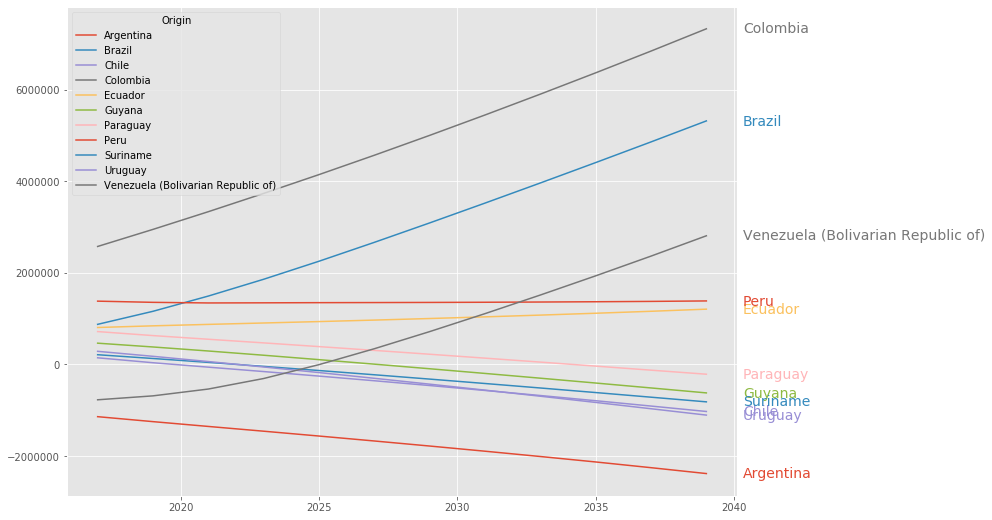

In [180]:
plot_netm_sd(countries["South America"], sd_df)

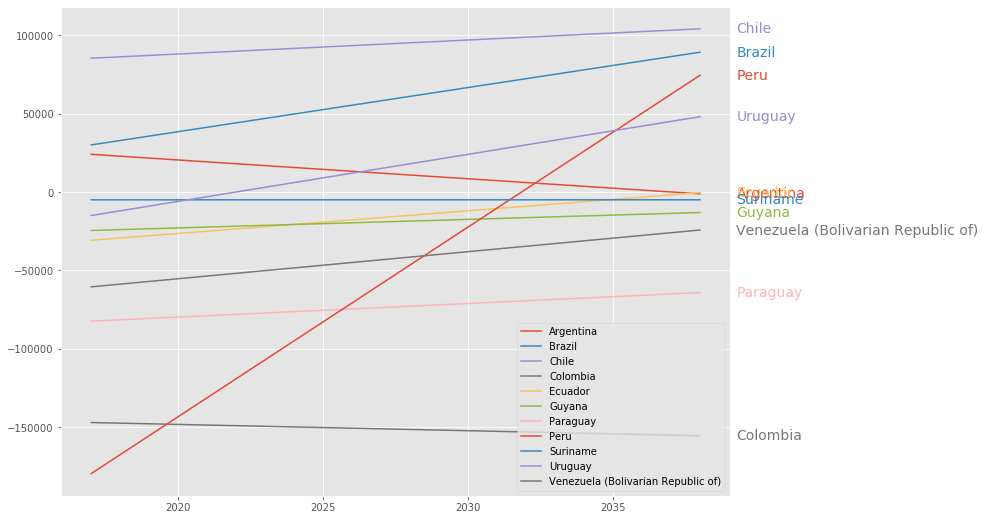

In [181]:
plot_extrapol_netm(countries["South America"], netm_df_extr)

## Conclusiones


Los grandes retos tienen una naturaleza compleja. Es decir, hay múltiples factores (x) que contribuyen al comportamiento de los fenómenos (y). Por un lado, buscamos identificar cuáles son las relaciones entre y y x: lineales, no lineales, etc. Por otro lado, queremos usar este conocimiento para predecir el futuro.

Este estudio exploró la migración desde un modelo SD. Se descubrió que los valores de migración varían significativamente según el país de interés. Sin embargo, se identificaron grupos de países que experimentaron la misma entrada, salida y migración neta. Para ello fueron creados diferentes modelos visuales (Headmap, Clúster Mapa, Diagrama de Acordes), los primeros desde el punto de vista descriptivo proporcionan una buena visión general del problema y, en segundo lugar, pueden ayudar a los responsables de las políticas a identificar coaliciones.

En el apartado de predicciones son complicadas por que las dinámicas de migraciones no son lineales. Las curvas extrapoladas son estimaciones muy simples sobre cómo se verá la migración neta dados los datos pasados, aparte se encuentra un gran ruido para el caso de Venezuela. Las técnicas de regresión mostraron que existe una relación entre la migración neta y el índice de estado frágil. Uno puede pensar en cómo una política que afectará estos indicadores y, por lo tanto, controlará los flujos migratorios. Una vez más, la estructura de estas relaciones no es clara como el agua. 

El poder exploratorio del índice de Estado Frágil es cuestionable debido a los bajos valores de las métricas de rendimiento. Sin embargo, los gráficos de los valores reales y los predichos parecen prometedores. Posiblemente, los formuladores de políticas apreciarán un rango de tasas de migración netas posibles en lugar de un solo valor.

La comparación entre los datos extrapolados y el modelo SD no proporciona mucha información. La hipótesis original era que estos resultados podían replicarse con bastante facilidad mediante algoritmos de aprendizaje automático. Desafortunadamente, esta tarea requiere más tiempo.

Para concluir, este estudio es una pequeña descripción de la dinámica de la migración mundial. Muestra al FSI como posibles puntos de intervención política. En general, el análisis permite confirmar que la disponibilidad de los datos y su ejecución en casos prácticos con poderosas herramientas de análisis.

## Referencias

1. International Organization for Migration. _2030 Agenda for Sustainable Development_. Retrieved from https://unofficeny.iom.int/2030-agenda-sustainable-development
2. Natural Earth (2018). _1:10m Cultural Vectors_. [Data sets in archive]. Retrieved from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
3. Pruyt, E., 2013. _Small System Dynamics Models for Big Issues: Triple Jump towards Real-World Complexity_. Delft: TU Delft Library. ISBN/EAN: 978-94-6186-195-5
4. The Fund For Peace (2018). _Fragile State Index 2018 - Annual report_. Derived from http://fundforpeace.org/fsi/2018/04/24/fragile-states-index-2018-annual-report/
5. The Fund For Peace (2018). _Fragile State Index_. [Data set in Excel file]. Retrieved from http://fundforpeace.org/fsi/excel/
6, The World Bank (2018). _Net migration_. [Data set in Excel file]. Retrieved from https://data.worldbank.org/indicator/SM.POP.NETM
7. United Nations. (2015). _International migrant stock 2015_ [Data set in Excel file]. Retrieved from http://www.un.org/en/development/desa/population/migration/data/estimates2/estimates15.shtml
8. Wigman, S. (2018). _Global Migration Dynamics: An Exploratory Study Integrating Multi-Resolution Modeling Techniques with Semiautomatic Data Acquisition_. Delft University of Technology, Delft, the Netherlands.